In [62]:
import numpy as np
from scipy.spatial import distance
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import pandas as pd
import math
import statistics 
import matplotlib.pyplot as plt
from random import randint
import itertools
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [63]:
def centroidFind(arr,clusters,seed = 2):
    rand = np.random.RandomState(seed)
    arr= np.array(arr)
    i = rand.permutation(arr.shape[0])[:clusters]
    print('i is:',i)
    return arr,arr[i]
    

In [64]:
def clustFind(arr, n_clusters):

    arr, centers1 = centroidFind(arr,n_clusters)
    while True:
        temp=[]
        dist=distance.cdist(arr, centers1, 'cityblock')
        for i in dist:
            temp.append(np.where(i==i.min())[0][0])
        labels=np.asarray(temp)
        
        temp = []
        for j in range(n_clusters):
            temp.append(arr[labels == j].mean(0)) 
            centersNew = np.array(temp)
            
        
        if np.all(centers1 == centersNew):
            break
        centers1 = centersNew

    return labels

In [65]:
def dataNow(filename):
    arr=[]    
    for line in open(filename):
        arr.append(line[:-1].split(' '))
    return arr

arr=[]
arr=dataNow(r'test2.txt')
arr=np.array(arr).astype(np)


In [66]:
#data and transforming
data =pd.read_csv('test2.txt', sep=",", header=None)
pca = sklearnPCA(n_components = 50)
PCA_projected_Data = pca.fit_transform(data)
tsne = TSNE(n_components=2, init='random',perplexity=50,n_iter=2000,n_iter_without_progress=1000,early_exaggeration=4)
data = tsne.fit_transform(PCA_projected_Data)


In [73]:
print("Transformed Data : ")
data

Transformed Data : 


array([[ 12.97374  ,  20.887926 ],
       [  0.5283924, -98.01599  ],
       [ 14.1509285, -10.978943 ],
       ...,
       [ 10.000304 ,  -6.897978 ],
       [ 27.476896 ,   5.439084 ],
       [ 13.861409 ,  40.38256  ]], dtype=float32)

In [74]:
arr = data
distortions = [] 
inertias = [] 
label1 = {} 
label2 = {} 
K = range(1,20) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(arr) 
    kmeanModel.fit(arr)     
      
    distortions.append(sum(np.min(cdist(arr, kmeanModel.cluster_centers_, 
                      'cityblock'),axis=1)) / arr.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    label1[k] = sum(np.min(cdist(arr, kmeanModel.cluster_centers_, 
                 'cityblock'),axis=1)) / arr.shape[0] 
    label2[k] = kmeanModel.inertia_ 


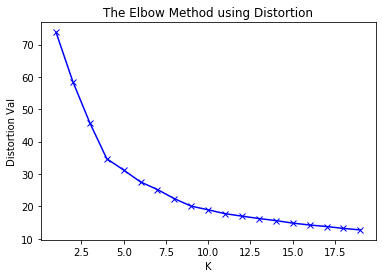

In [79]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('K') 
plt.ylabel('Distortion Val') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [80]:
labels = clustFind(data,10)

i is: [7878 3224 1919 4432 4835 4895 7269 1451 1742 4628]


In [85]:
f=open("Resultmnist.txt","w")

for a in labels:
    f.write(str(a+1))
    f.write("\n")

f.close()

Succesful


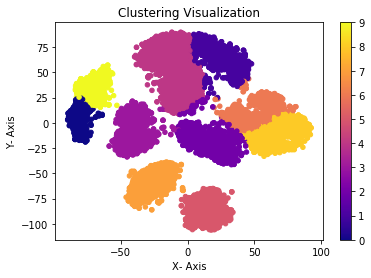

In [84]:
#Plotting the cluster obtained using GMM
val1, val2 = data[:, 0], data[:, 1]
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(val1, val2,
                     c= labels,s=20, cmap='plasma')
ax.set_title('Clustering Visualization')
ax.set_xlabel('X- Axis')
ax.set_ylabel('Y- Axis')
plt.colorbar(scatter)
print('Succesful')